In [1]:
from datasets import load_dataset

dataset = load_dataset("hungnm/multilingual-amazon-review-sentiment-processed")

/home/nalin/yes/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
desired_features = ['stars', 'text', 'language']
reduced_dataset = dataset.select_columns(desired_features)

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 1325529
    })
    validation: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 47490
    })
    test: Dataset({
        features: ['stars', 'text', 'language', 'label', 'len', 'valid', 'input_ids', 'attention_mask'],
        num_rows: 47488
    })
})

In [4]:
reduced_dataset

DatasetDict({
    train: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 1325529
    })
    validation: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 47490
    })
    test: Dataset({
        features: ['stars', 'text', 'language'],
        num_rows: 47488
    })
})

In [29]:
train= reduced_dataset['train']
test= reduced_dataset['test']
val= reduced_dataset['validation']

In [30]:
set(list(train['stars']))

{1, 2, 4, 5}

In [31]:
def remap_labels(example):
    class_mapping = {1: 0, 2: 1, 4: 2, 5: 3}
    example['stars'] = class_mapping.get(example['stars'])  
    return example

train = train.map(remap_labels)
val = val.map(remap_labels)
test = test.map(remap_labels)


Map: 100%|██████████| 47488/47488 [00:01<00:00, 27573.86 examples/s]


In [32]:
set(list(train['stars']))

{0, 1, 2, 3}

In [33]:

languages_train=set(list(test['language']))
languages_test=set(list(train['language']))
languages_val=set(list(val['language']))


In [34]:
languages_train,languages_test,languages_val

({'de', 'en', 'es', 'fr', 'ja', 'zh'},
 {'de', 'en', 'es', 'fr', 'ja', 'zh'},
 {'de', 'en', 'es', 'fr', 'ja', 'zh'})

In [35]:
# English, Japanese, German, French, Chinese and Spanish

In [36]:

de_train=train.filter(lambda example: example['language']=='de')
en_train=train.filter(lambda example: example['language']=='en')
fr_train=train.filter(lambda example: example['language']=='fr')
es_train=train.filter(lambda example: example['language']=='es')
ja_train=train.filter(lambda example: example['language']=='ja')
zh_train=train.filter(lambda example: example['language']=='zh')

de_test=test.filter(lambda example: example['language']=='de')
en_test=test.filter(lambda example: example['language']=='en')
fr_test=test.filter(lambda example: example['language']=='fr')
es_test=test.filter(lambda example: example['language']=='es')
ja_test=test.filter(lambda example: example['language']=='ja')
zh_test=test.filter(lambda example: example['language']=='zh')

de_val=val.filter(lambda example: example['language']=='de')
en_val=val.filter(lambda example: example['language']=='en')
fr_val=val.filter(lambda example: example['language']=='fr')
es_val=val.filter(lambda example: example['language']=='es')
ja_val=val.filter(lambda example: example['language']=='ja')
zh_val=val.filter(lambda example: example['language']=='zh')



Filter: 100%|██████████| 47490/47490 [00:00<00:00, 283558.68 examples/s]


In [37]:
de_train

Dataset({
    features: ['stars', 'text', 'language'],
    num_rows: 218695
})

In [38]:
de_train_lang=set(list(de_train['language']))
en_train_lang=set(list(en_train['language']))
fr_train_lang=set(list(fr_train['language']))
es_train_lang=set(list(es_train['language']))
ja_train_lang=set(list(ja_train['language']))
zh_train_lang=set(list(zh_train['language']))

de_test_lang=set(list(de_test['language']))
en_test_lang=set(list(en_test['language']))
fr_test_lang=set(list(fr_test['language']))
es_test_lang=set(list(es_test['language']))
ja_test_lang=set(list(ja_test['language']))
zh_test_lang=set(list(zh_test['language']))

de_val_lang=set(list(de_val['language']))
en_val_lang=set(list(en_val['language']))
fr_val_lang=set(list(fr_val['language']))
es_val_lang=set(list(es_val['language']))
ja_val_lang=set(list(ja_val['language']))
zh_val_lang=set(list(zh_val['language']))


In [39]:
de_train_lang,en_train_lang,fr_train_lang,es_train_lang,ja_train_lang,zh_train_lang


({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [40]:
de_test_lang,en_test_lang,fr_test_lang,es_test_lang,ja_test_lang,zh_test_lang


({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [41]:
de_val_lang,en_val_lang,fr_val_lang,es_val_lang,ja_val_lang,zh_val_lang

({'de'}, {'en'}, {'fr'}, {'es'}, {'ja'}, {'zh'})

In [42]:
columns_needed=['stars', 'text']
de_train = de_train.select_columns(columns_needed)
en_train = en_train.select_columns(columns_needed)
fr_train = fr_train.select_columns(columns_needed)
es_train = es_train.select_columns(columns_needed)
ja_train = ja_train.select_columns(columns_needed)
zh_train = zh_train.select_columns(columns_needed)



In [43]:
de_test = de_test.select_columns(columns_needed)
en_test = en_test.select_columns(columns_needed)
fr_test = fr_test.select_columns(columns_needed)
es_test = es_test.select_columns(columns_needed)
ja_test = ja_test.select_columns(columns_needed)
zh_test = zh_test.select_columns(columns_needed)


In [44]:
de_val = de_val.select_columns(columns_needed)
en_val = en_val.select_columns(columns_needed)
fr_val = fr_val.select_columns(columns_needed)
es_val = es_val.select_columns(columns_needed)
ja_val = ja_val.select_columns(columns_needed)
zh_val = zh_val.select_columns(columns_needed)


In [45]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }



In [46]:
tokenizer = BertTokenizer.from_pretrained('cl-tohoku/bert-base-japanese')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [47]:


from collections import defaultdict
import random
max_length=512
train_dataset = CustomDataset(ja_train['text'], ja_train['stars'], tokenizer, max_length)



from torch.utils.data import random_split, DataLoader

# Define the desired number of entries
desired_num_entries = 50000


# Split the train dataset to get the desired number of entries
train_dataset_subset, _ = random_split(train_dataset, [desired_num_entries, len(train_dataset) - desired_num_entries])

val_dataset = CustomDataset(ja_val['text'], ja_val['stars'], tokenizer, max_length)
test_dataset = CustomDataset(ja_test['text'], ja_test['stars'], tokenizer, max_length)
from torch.utils.data import Dataset, DataLoader

train_loader = DataLoader(train_dataset_subset, batch_size=16*4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16*4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16*4, shuffle=False)



In [48]:
ja_train['stars']

[3,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 1,
 0,
 1,
 0,
 1,
 3,
 3,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 1,
 0,
 3,
 3,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 3,
 3,
 3,
 0,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 3,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 2,
 0,
 3,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 0,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 0,
 0,
 3,
 1,
 0,
 2,
 1,
 3,
 0,
 2,
 1,
 2,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 3,
 3,
 2,
 3,
 1,
 2,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 3,
 3,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 3,
 2,
 0,
 2,
 1,
 1,


In [49]:
from collections import defaultdict
import random
from torch.utils.data import Subset

from torch.utils.data import random_split, DataLoader

# Define the desired number of entries
desired_num_entries = 50000

# Define a dictionary to store indices for each class
class_indices = defaultdict(list)

# Populate the dictionary with indices for each class
for idx, label in enumerate(ja_train['stars']):
    class_indices[label].append(idx)

# Sample an equal number of entries from each class
sampled_indices = []
for label, indices in class_indices.items():
    sampled_indices.extend(random.sample(indices, desired_num_entries // len(class_indices)))

# Create a subset of the train dataset with the sampled indices
train_dataset_subset = Subset(train_dataset, sampled_indices)

# Create DataLoaders for train, validation, and test datasets
train_loader = DataLoader(train_dataset_subset, batch_size=16 * 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16 * 4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16 * 4, shuffle=False)


In [50]:
from collections import Counter

# Initialize a Counter to count the occurrences of each label
label_counter = Counter()

# Iterate through the train_dataset_subset to count labels
for sample in train_dataset_subset:
    label = sample['labels']  # Assuming 'label' is the key for the label in your dataset
    label_counter[label] += 1

# Print the count of each label
print("Label Counts in Train Dataset Subset:")
for label, count in label_counter.items():
    print(f"Label {label}: {count} samples")


Label Counts in Train Dataset Subset:
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 samples
Label 3: 1 s

In [51]:
device = torch.device('cuda')
model = BertForSequenceClassification.from_pretrained('cl-tohoku/bert-base-japanese', num_labels=4)




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Train Loss: 0.9952030762687059, Validation Loss: 0.8908102788925171, F1 Score: 0.5724201793508815


Epoch 2/3, Train Loss: 0.8276558506976613, Validation Loss: 0.8695943012237549, F1 Score: 0.5994837813558674


Epoch 3/3, Train Loss: 0.7322067592454993, Validation Loss: 0.8755421097278595, F1 Score: 0.5966306033118262


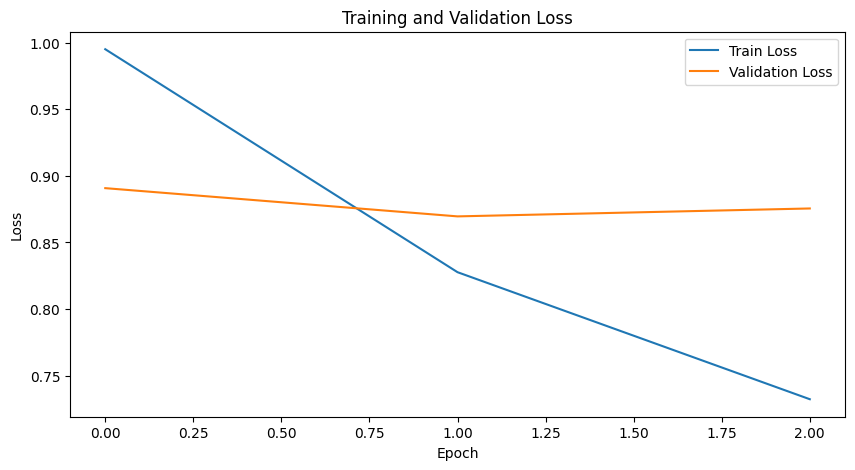

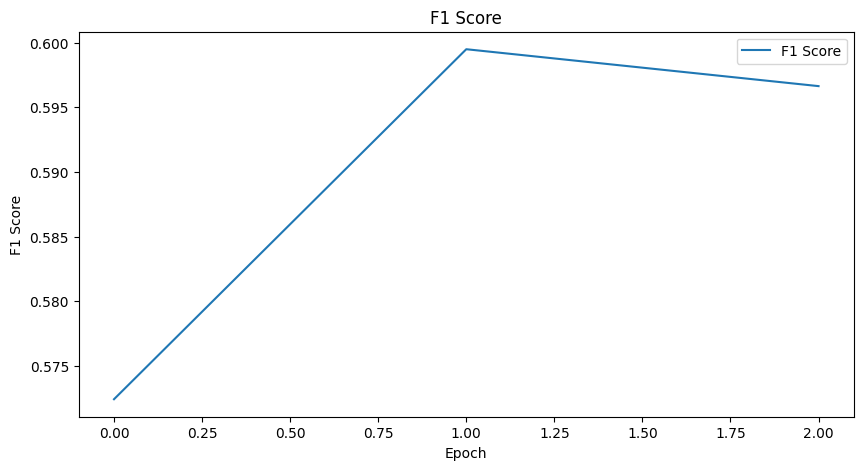

In [52]:
import torch
from tqdm import tqdm
from sklearn.metrics import f1_score

# Move model to the specified device (GPU)
device = torch.device('cuda')
model = model.to(device)

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Initialize lists to store losses and f1 scores
train_losses = []
val_losses = []
f1_scores = []

num_epochs = 3
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch', leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Compute average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_predicted = []
    val_labels = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc='Validation', unit='batch', leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            val_loss += loss.item()  # Accumulate validation loss
            
            _, predicted = torch.max(logits, 1)
            val_predicted.extend(predicted.tolist())
            val_labels.extend(labels.tolist())
            
    # Compute average validation loss for the epoch
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Compute F1 score for the epoch
    f1 = f1_score(val_labels, val_predicted, average='weighted')
    f1_scores.append(f1)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Validation Loss: {val_loss}, F1 Score: {f1}")

# Plot training and validation loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot F1 score curve
plt.figure(figsize=(10, 5))
plt.plot(f1_scores, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score')

plt.legend()
plt.show()


In [53]:
# Test
model.eval()
test_predicted = []
test_labels = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing', unit='batch', leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        _, predicted = torch.max(logits, 1)
        test_predicted.extend(predicted.tolist())
        test_labels.extend(labels.tolist())

# Compute F1 score for the test data
test_f1 = f1_score(test_labels, test_predicted, average='weighted')

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, test_predicted)

# Print test F1 score
print(f"Test F1 Score: {test_f1}")
print(f"Test Accuracy: {accuracy}")


Test F1 Score: 0.5912768936228565
Test Accuracy: 0.5933241655206901


In [54]:
# save the model
model.save_pretrained("ja_model")